<a href="https://colab.research.google.com/github/Arthur2303/Transformada-Z/blob/main/Transformada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa - Transformada Z**

_Usando a Transformada z, projete uma função real, cuja amplitude seja constante e causal. Para essa função desenhe o diagrama de pólos e zeros, a posição do pólo e a transformada de Fourier._ 


_Aluno: Arthur Henrique_ \\
_Professor: Edmar Gurjão_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = False

j = complex(0,1)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


def plota_pole_and_zero(Polos, Zeros):
    
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    
    # criação das linhas dos eixos no plot
    ax.axhline(y=0, color = '0.5')
    ax.axvline(x=0, color = '0.5')

    # criação do círculo unitário
    circle = plt.Circle((0,0), radius = 1.0, fill=False, color='black')
    ax.add_patch(circle)

    # limita o plot
    plt.xlim([-2,2])
    plt.ylim([-2,2])

    # plota os zeros e os polos
    for Pole in Polos:
      ax.scatter(complex(Pole).real,complex(Pole).imag, s = 250, marker = 'x', label = 'Polos')
    for Zero in Zeros:
      ax.scatter(complex(Zero).real,complex(Zero).imag, s = 250,  marker = 'o', label = 'Zeros' )

    plt.title('Diagrama de Polos e Zeros')
    plt.xlabel('Re{Z}')
    plt.ylabel('Im{Z}')
    plt.legend()
    plt.grid()

def heaviside(k):
  return np.where(k >= 0, 1.0, 0.0)

**Example: $ x[n] = α^n \cdot u[n], α = 1.$**

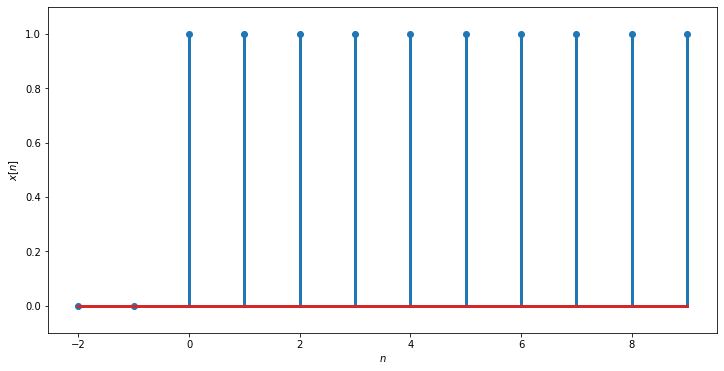

In [ ]:
plt.figure(figsize=(12,6))
n = np.arange(-2, 10, 1,dtype=float)
x = (1**n) * heaviside(n)
plt.stem(n, x, markerfmt = 'o')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.ylim([-0.1, 1.1])
plt.savefig('x[n].png')
plt.show()


In [ ]:
z, α = sp.symbols('z α')

# Transformada Z do sinal x[n] plotado acima
X =  z / (z - α)

X

z/(z - α)

In [ ]:
sp.numer(X)

z

In [ ]:
sp.denom(X)

z - α

In [ ]:
# Zeros da transformada
Zeros = sp.roots(sp.numer(X),z)
Zeros

{0: 1}

In [ ]:
# Polos da transformada
X = X.subs(α, 1)
Polos = sp.roots(sp.denom(X),z)
Polos

{1: 1}

In [ ]:
# Z / (z - 1)
b = [1, 0]
a = [1, -1]

# Calcula a resposta de frequência de um filtro digital
w, h = signal.freqz(b,a)

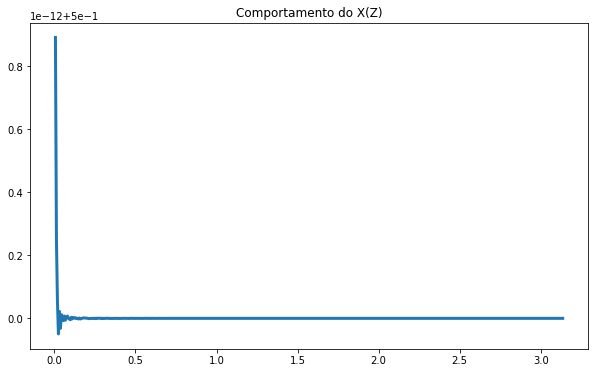

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Comportamento do X(Z)")
plt.plot(w,h)
plt.show()

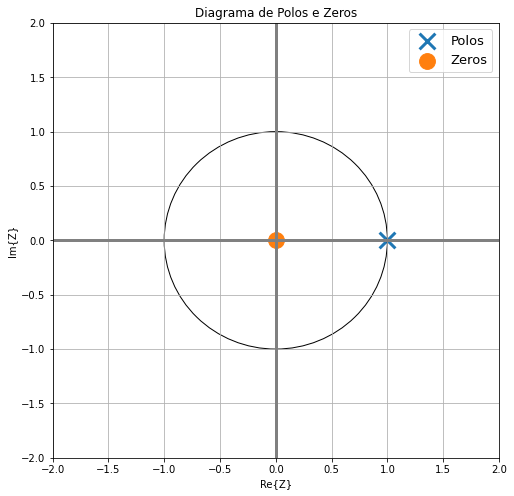

In [ ]:
# Sistemas sem oscilação têm pólos sobre o lado direito do eixo X (ângulo zero).
plota_pole_and_zero(Polos, Zeros)
plt.savefig('DiagramaDePoloseZeros.png')

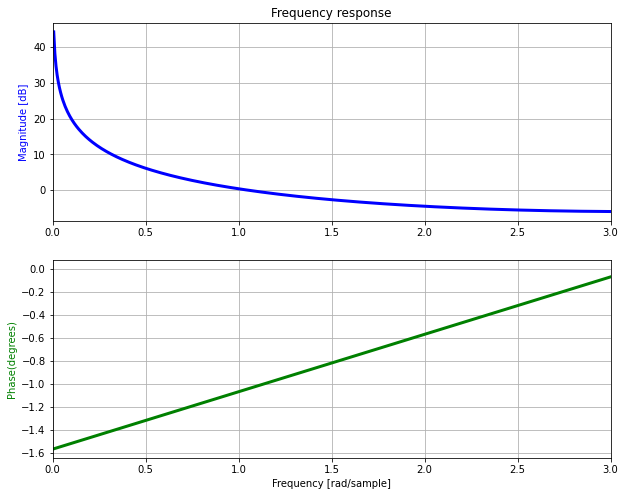

In [ ]:
# Frequência de Fourier
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.title('Frequency response')

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Magnitude [dB]', color='b')
plt.xlim([0,3])
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w, np.angle(h), 'g')
plt.ylabel('Phase(degrees)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.xlim([0,3])
plt.grid(True)

plt.savefig('FrequencyResponse.png')
plt.show()